## 이상치(특이값)outlier
* 정상적이라고 생각되는 데이터의 범위 밖에 위치하는 값들을 의미
* 잘못 입력하거나, 정상이지만, 상황에 따라 큰 값이 입력되는 경우에 주로 발생
* 이것을 이용해서 제조공정상의 불량품 검출 또는 금융거래상에서 비정상 거래 탐지, 게임등에서 비정상 활동을 탐지할때 주로 사용함
* 특이값은 전체 데이터의 평균을 끌어 올리거나 낮추는등 왜곡을 가져오므로 분석시 제거하는 것이 좋음
* 이상치를 판단하는 기준은 3사분위수에서 +1.5IQR, 1사분위수에서 -1.5IQR를 넘어가는 경우

### 상자수염 그래프
* box-and-whisker plot
* 데이터의 대략적인 분포와 개별적인 이상치들을 동시에 보여줄 수 있으며
* 서로 다른 데이터 뭉치를 쉽게 비교할 수 있도록 도와주는 시각화 기법
* 통계학자 존 튜키(John Tukey)가 1977년 저서 "탐색적 데이터 분석(Exploratory Data Analysis)"에서 처음 제시
* 범위 막대에서는 수염의 양 끝이 최대값과 최소값을 나타내고,
* 상자는 사분위수범위를 나타내며
* 상자 안에 중앙값을 표현하는 방식으로 "5가지 요약 수치" 를 표현

In [1]:
# 미국 50개 주 통계자료 중 주별 수입income 분석
head(state.x77)

,Population,Income,Illiteracy,Life Exp,Murder,HS Grad,Frost,Area
Alabama,3615,3624,2.1,69.05,15.1,41.3,20,50708
Alaska,365,6315,1.5,69.31,11.3,66.7,152,566432
Arizona,2212,4530,1.8,70.55,7.8,58.1,15,113417
Arkansas,2110,3378,1.9,70.66,10.1,39.9,65,51945
California,21198,5114,1.1,71.71,10.3,62.6,20,156361
Colorado,2541,4884,0.7,72.06,6.8,63.9,166,103766


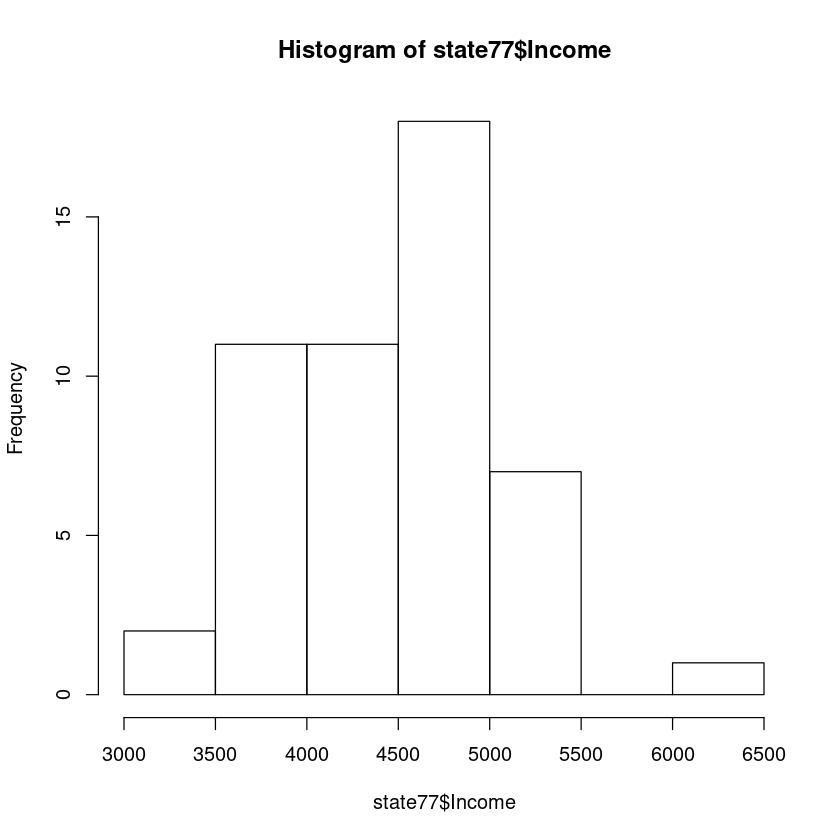

In [2]:
# 시각화
state77 <- data.frame(state.x77)
hist(state77$Income)

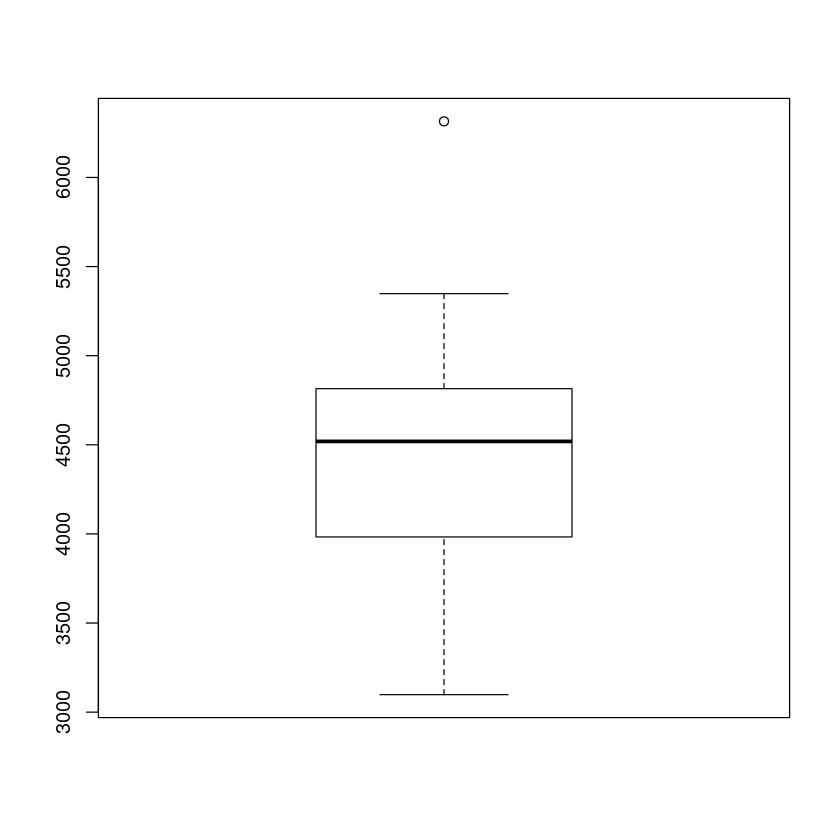

In [3]:
# 주별 수입이 6000~6500인 데이터가 존재

# 이상치 여부 확인
bp <- boxplot(state77$Income)

In [4]:
# 이상치 확인
# $ststs : 5가지 요약수
# $out : 이상치
bp$out

[1] 6315

In [5]:
# 이상치가 있는 주이름은?
state77[state77$Income == bp$out, ]

,Population,Income,Illiteracy,Life.Exp,Murder,HS.Grad,Frost,Area
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Alaska,365,6315,1.5,69.31,11.3,66.7,152,566432


In [6]:
# 이상치를 제거하려면 해당 컬럼의 값을 NA로 바꾼후 na.omit 사용
s77Income <- state77$Income
s77Income[s77Income == bp$out] <- NA
s77Income  # NA 확인

[1] 3624   NA 4530 3378 5114 4884 5348 4809 4815 4091 4963 4119 5107 4458 4628
[16] 4669 3712 3545 3694 5299 4755 4751 4675 3098 4254 4347 4508 5149 4281 5237
[31] 3601 4903 3875 5087 4561 3983 4660 4449 4558 3635 4167 3821 4188 4022 3907
[46] 4701 4864 3617 4468 4566

In [7]:
s77Income <- na.omit(s77Income)  # 이상치 제거

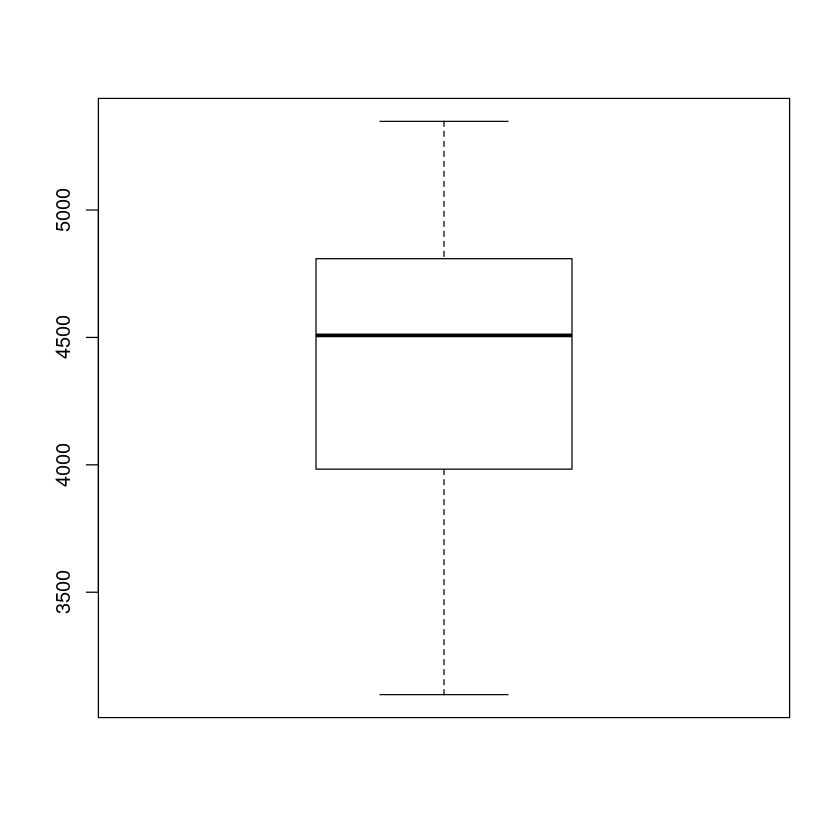

In [8]:
boxplot(s77Income)

In [13]:
## titanic데이터 이상치 처리
# load('data/titanic.rdata')

In [14]:
# 승객들이 지불한 요금에서 이상치 여부 확인
# bp <- boxplot(titanic$fare)
# bp$stats